# Programming Assignment 11: iTer-remoto

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px" />
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 2.3. Due: complete this PA prior to class on Friday, Dec 1, 2023 (but better if you do it by Wed, Nov 29!).*

## Overview of Assignment

This assignment will address a few simple, but useful, topics related to indexing and iterating in Python, illustrated with an annotated stem figure. The content of this PA is simple, but will be used directly in the Wednesday workshop this week.

Specifically, we will look at:
- iterables and iterable objects
- iterables `range`, `enumerate` and `zip`
- the modulo operator `%`
- plot type `stem`

## Assignment Criteria

**You will pass this assignment as long as your respository fulfills the following criteria:**  

- You have completed this notebook and it runs without errors

In [156]:
import numpy as np
import matplotlib.pyplot as plt

## Introduction

Suppose we are writing code to summarize some simple data, perhaps a group of teams that each have a score for a particular game.

In [157]:
team = ['green', 'red', 'blue']
score = [5, 9, 7]

Suppose we want to list the names of each team. One typical approach is to loop over each item in the list:

In [158]:
N_teams = len(team)
print('The team names are:')
for i in range(N_teams):
    print(f'{team[i]}')

The team names are:
green
red
blue


However, this is not the most efficient way to do this, as we need to define two extra variables: `N_teams` and the iteration index `i`. There is a better way! 

## Iterable Objects

Python supports what is referred to as _iterable_ objects: generally, this means objects that can be easily used by Python's built-in and efficient iteration schemes. Examples are: list, tuple, dictionaries, and strings. You may be interested in reading about all of [the technical details here](https://docs.python.org/3/glossary.html#term-iterator); however, for this assignment the explanations here and examples below are sufficient. It is important to recognize this type of object exists in Python, so we can take advantage of it in our code, or so you can recognize the algorithms in other authors code.

Let's see an iterable object in action. First, an easy way to test if an object is iterable is to use it as an argument of the `iter()` method:

In [159]:
iter(team)

Other objects can also be made into an iterator, like numpy arrays:

In [160]:
iter(np.array([1, 5, 67]))


The cell above should return `iterator`, which indicates the object (argument) is iterable. An integer, however, is _not_ iterable. 

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1:</b>   
    
Try running the code below to confirm that an integer is not iterable (an error will occur), then fix it by converting the argument to an iterable object. Experiment by turning the integer into a list, string and np.array. 
</p>
</div>

In [161]:
iter(np.array([5]))

Great, you can make an iterator! But what do you _do_ with it? 

_Most of the time we simply use it in a `for` loop, but it is worthwhile to understand this object a bit more deeply._

One simple way to understand an iterator is to imagine that it is a way of (efficiently!) turning your iterable object into something that can go sequentially through all its values. To do this it has two "abilities":

1. the iterator knows its current value, and 
2. the iterator knows its next value

Let's try using the iterator by running the following cells:

In [162]:
letters = 'abcde'
letter_iterator = iter(letters)

Nothing new yet, but now watch what happens when we use the Python built-in command `next()`

_Run the cell multiple times._

In [163]:
next(letter_iterator)

'a'

There are two key things to note here:

1. The iterator "knows" how to go through all of its values, and
2. Calls to `next` returns to value itself, _not the index!_

This is a very useful feature, as we can see in this simple example below:

In [164]:
for i in letters:
    print(i)

a
b
c
d
e


Obviously this is a simple `for` loop, but hopefully the explanation above indicates what is actually happening "under the hood" of the `for` loop:
 
1. identifies `letters` as an iterable object
2. converts it into an iterator, and then it
3. finds the next value in the sequence and assigns it to variable `i`
4. stop once there is no next value
 
This is a bit of a simplification of what happens in reality, but it gets the idea across.

Now let's take a look at something you have probably used a lot: the `range()` method:

In [165]:
print(type(range(5)))
print(range(5))

<class 'range'>
range(0, 5)


Although it looks like it produces a tuple, `range` is a special iterable object that simply counts. As we can see it works the same as our `for` loop above:

In [166]:
for i in range(5):
    print(i)

0
1
2
3
4


Hopefully this explains why `range` is such a useful feature for accessing sequential indexed elements of arrays.

It turns out there are two more built-in Python methods that produce useful iterable objects: `enumerate` and `zip`. Let's take a look ath their doc strings.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2:</b>   
    
Read the docstrings below for the two methods. Confirm that they produce an iterable, but compare them to observe how the input and output of each is different. Can you imagine why one could be more useful than another in certain situations?
</p>
</div>


`enumerate`:

```Python
Init signature: enumerate(iterable, start=0)
Docstring:     
Return an enumerate object.

  iterable
    an object supporting iteration

The enumerate object yields pairs containing a count (from start, which
defaults to zero) and a value yielded by the iterable argument.

enumerate is useful for obtaining an indexed list:
    (0, seq[0]), (1, seq[1]), (2, seq[2]), ...
```

And `zip`:

```Python
Init signature: zip(self, /, *args, **kwargs)
Docstring:     
zip(*iterables, strict=False) --> Yield tuples until an input is exhausted.

   >>> list(zip('abcdefg', range(3), range(4)))
   [('a', 0, 0), ('b', 1, 1), ('c', 2, 2)]

The zip object yields n-length tuples, where n is the number of iterables
passed as positional arguments to zip().  The i-th element in every tuple
comes from the i-th iterable argument to zip().  This continues until the
shortest argument is exhausted.

If strict is true and one of the arguments is exhausted before the others,
raise a ValueError.
```

<br><br><br><br><br><br><br><br><br><br><br>

The main takeaways, should be as follows:

1. Yes, they both produce an iterator
2. `enumerate` takes one iterable object and returns indices along with the value
3. `zip` takes two iterable objects and returns their values

Let's try them out by running the next cell. Does it behave as expected?

In [167]:
thing_1 = 'roberts_string'
thing_2 = [2, 3, 36, 3., 1., 's', 7, '3']

test_1 = enumerate(thing_1)
print(f'We created: {test_1}')
print(next(test_1), next(test_1), next(test_1))

test_2 = zip(thing_1, thing_2)
print(f'We created: {test_2}')
print(next(test_2), next(test_2), next(test_2))

We created: <enumerate object at 0x0000021923B0BE20>
(0, 'r') (1, 'o') (2, 'b')
We created: <zip object at 0x0000021923BBFA80>
('r', 2) ('o', 3) ('b', 36)


Can you see the difference?

Looking at them in a for loop will also illustrate what's going on:

In [168]:
print('First, enumerate:')
for i, j in enumerate(thing_1):
    print(i, j)
print('\nThen, zip:')    
for i, j in zip(thing_1, thing_2):
    print(i, j)

First, enumerate:
0 r
1 o
2 b
3 e
4 r
5 t
6 s
7 _
8 s
9 t
10 r
11 i
12 n
13 g

Then, zip:
r 2
o 3
b 36
e 3.0
r 1.0
t s
s 7
_ 3


Now let's return to our teams from the beginning of this assignment: let's apply our knowledge of `enumerate` and `zip` to see if we can print out the points per team in an efficient way.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3:</b>   
    
Use <code>enumerate</code> to print out the summary of points per team according to the print statement.
<br><br>
<em>Hint: you only need to use one of the lists as an argument.</em>
</p>
</div>

In [169]:
team = ['green', 'red', 'blue']
score = [5, 9, 7]

for i,j in enumerate(team):
    print(f'Team {j} has {score[i]} points.')

Team green has 5 points.
Team red has 9 points.
Team blue has 7 points.


You may have noticed that `enumerate` is a bit awkward for this case, since we still need to define an unnecessary iteration index to access the team name. Let's see if `zip` makes things easier:

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 4:</b>   
    
Use <code>zip</code> to print out the summary of points per team according to the print statement.
</p>
</div>

In [170]:
team = ['green', 'red', 'blue']
score = [5, 9, 7]

for i in zip(team,score):
    print(f'Team {i[0]} has {i[1]} points.')

Team green has 5 points.
Team red has 9 points.
Team blue has 7 points.


That's really compact!

## Modulo Operator `%`

The modulo operator `%` is common in programming languanges, but not so much in our typical engineering problems. It turns out it can be very useful in iteration loops. It's actually quite simple: _the expression_ `a % b` _returns the remainder of `a/b`._ That's it!

Take a look at the folloiwing examples that illustrate the operator:

In [171]:
print(6 % 5)
print(5 % 6)
print(1 % 10)
print(5 % 5)
print(0 % 5)

1
5
1
0
0


You can't divide by zero, just as in normal division.

Below is an illustration for how the modulo is useful for doing things in a `for` loop that doesn't need to be done on every iteration.

In [172]:
for i in range(100):
    if i%25 == 0:
        print(i)

0
25
50
75


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 5:</b>   
    
Experiment with the two Python cells above and make sure you understand what the modulo operator is and how it works.
</p>
</div>

We won't do anything else with `%` now, but will apply this in the last task of the assignment.

## Stem Plot Type

You have probably used the matplotlib plot types `plot`, `hist` and `scatter` frequently; another type is `stem`, which is useful for indicating the magnitude of various points along a number line. As with a scatter plot, the data does not need to be ordered, and missing values are easy to handle.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 6:</b>   
    
Run the cell below and play with the values to make sure you are comfortable with the stem plot type. Do you see how it can handle two values with the same index?
</p>
</div>

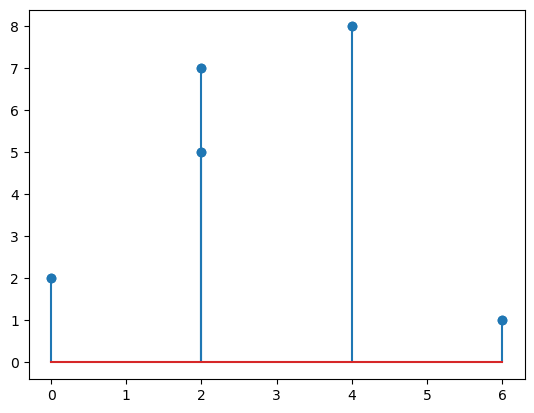

In [173]:
value = [2, 7, 5, 1, 8]
index = [0, 2, 2, 6, 4]
plt.plot(index, value, 'o')
plt.stem(index, value);

## Bringing it all together: Earthquake analysis

To put the ideas above into practice, consider the following data, in the form of three lists, that describes the largest earthquakes in the world since 2025, that are also located on the ring of fire (Source: [Wikipedia](https://en.wikipedia.org/wiki/Lists_of_earthquakes)).

In [174]:
year = [2003, 2011, 2013,
        2006, 2022,
        2017, 2019, 2001, 2010, 2015,
        2014, 2022, 2016,
        2000, 2007, 2012, 2005, 2004]

magn = [8.3, 9.1, 8.3,
        8.3, 7.6,
        8.2, 8.0, 8.4, 8.8, 8.3,
        8.2, 7.6, 7.9,
        8.0, 8.4, 8.6, 8.6, 9.1]

site = ['Japan, Hokkaidō',
        'Japan, Honshu',
        'Russia, Sea of Okhotsk',
        'Russia, Kuril Islands',
        'Mexico, Michoacán',
        'Mexico, Chiapas',
        'Peru, Loreto',
        'Peru, Arequipa',
        'Chile, Concepción',
        'Chile, Coquimbo',
        'Chile, Iquique',
        'Papua New Guinea, Morobe',
        'Papua New Guinea, New Ireland',
        'Papua New Guinea',
        'Indonesia, Sumatra',
        'Indonesia, Indian Ocean',
        'Indonesia, Simeulue',
        'Indonesia, Sumatra']

We can visualize the data in the following figure. Can you find an easy way to recreate this plot?

![earthquake plot](./earthquakes.svg)

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 7:</b>   
    
Using the tools described in this assignment, recreate the plot above. Note that to avoid cluttering the figure, the detailed earthquake information is only plotted for years that are a multiple of 5 (i.e., 2000, 2005, etc.).
</p>
</div>

**Hints:** create a for loop using 3 iterables (`x`, `y` and `z`) based on _one_ of these iterable tools: `range`, `enumerate` or `zip`. Use the modulo operator `%` to choose the 5-year multiples. An outline of the solution in pseudo-code is also provided here, each of which should be one line in your code (except item 5):
```
1  for each iterable item
2     if the year is a multiple of 5
3         create the label (string)
4         annotate the plot (i.e., annotate(...))
5  include any additional formatting (more than one line)
```

2


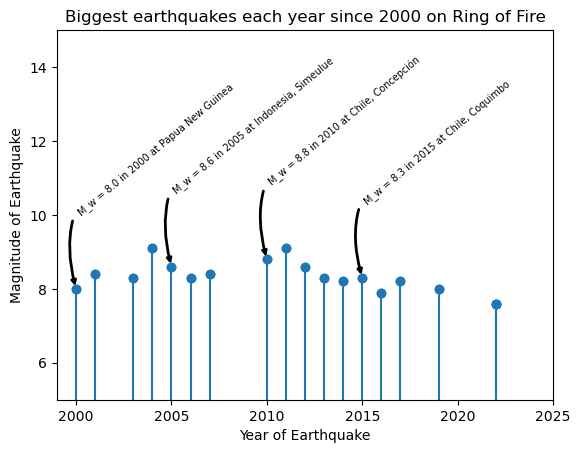

In [175]:
plt.plot(year,magn,'o')
plt.stem(year,magn)
for i in zip(magn,year,site):
    if i[1] % 5 == 0:
        label = f"M_w = {i[0]} in {i[1]} at {i[2]}"
        plt.annotate(label, xy=(i[1], i[0]),
                     xytext=(i[1], i[0]+2),
                     rotation=40,fontsize=7,
                     arrowprops=dict(arrowstyle= '-|>',
                             connectionstyle="arc3,rad=0.5",
                             color='black',
                             lw=2,
                             ls='-')
                     )
plt.xlim([1999, 2025])
plt.ylim([5,15])
plt.xlabel("Year of Earthquake")
plt.ylabel("Magnitude of Earthquake")
plt.title("Biggest earthquakes each year since 2000 on Ring of Fire")


**End of notebook.**
<h2 style="height: 60px">
</h2>
<h3 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; bottom: 60px; right: 50px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">
      <img alt="Creative Commons License" style="border-width:; width:88px; height:auto; padding-top:10px" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png"/>
    </a>
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png"/>
    </a>
    
</h3>
<span style="font-size: 75%">
&copy; Copyright 2023 <a rel="MUDE Team" href="https://studiegids.tudelft.nl/a101_displayCourse.do?course_id=65595">MUDE Teaching Team</a> TU Delft. This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.